In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5307.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5333.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5147.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5392.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5371.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5158.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5330.jpg
/kaggle/input/landmark-images-for-clasiification/Images Data/Mount_Arapiles-20231230T041302Z-001/Mount_Arapiles/5132.jpg
/kaggle/input/landmark-images-fo

In [2]:
# Import necessary libraries
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch
import multiprocessing

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the dataset path on Kaggle
base_path = "/kaggle/input/landmark-images-for-clasiification/Images Data"

# Use torchvision.transforms.Normalize for mean and std normalization
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Use torchvision.transforms.Compose for data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ])
}

# Load the dataset with the specified transformations
full_dataset = datasets.ImageFolder(base_path)

# Split the dataset into train, validation, and test sets
train_size = int(0.6 * len(full_dataset))
val_size = int(0.2 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    full_dataset,
    [train_size, val_size, test_size]
)

# Apply transforms to the datasets
train_dataset.dataset.transform = data_transforms['train']
val_dataset.dataset.transform = data_transforms['val']
test_dataset.dataset.transform = data_transforms['test']

# Create data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=multiprocessing.cpu_count(), pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=multiprocessing.cpu_count(), pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=multiprocessing.cpu_count(), pin_memory=True)


In [3]:
classes = full_dataset.classes
print("Class Names:", classes)

Class Names: ['Akkerman_fortress-20231230T031135Z-001', 'Angkor_Wat-20231230T031410Z-001', 'Biblioteca_Nacional_de_Espaa-20231230T031413Z-001', 'Botanical_Garden_Jevremovac-20231230T031922Z-001', 'Botanical_Garden_KIT-20231230T031417Z-001', 'Botanical_garden_in_Kryvyi_Rih-20231230T031414Z-001', 'Burrator-20231230T031418Z-001', 'Caesarea_Maritima-20231230T031420Z-001', 'Central_Park-20231230T032009Z-001', 'Citadelle_de_Qubec-20231230T032014Z-001', 'Corktown_Toronto-20231230T032020Z-001', 'Dead_Sea-20231230T032120Z-001', 'Dwarves_in_Wrocaw-20231230T032124Z-001', 'Edinburgh_Castle-20231230T032131Z-001', 'Eiffel_Tower-20231230T032138Z-001', 'Enchanted_Floral_Gardens_of_Kula-20231230T032141Z-001', 'Enz-20231230T032145Z-001', 'Episcopal_Diocese_of_Southwest_Florida-20231230T032150Z-001', 'Financial_District_Manhattan-20231230T035758Z-001', 'First_Landing_State_Park-20231230T035759Z-001', 'Fomin_Botanical_Garden-20231230T035801Z-001', 'Forest_of_Dean-20231230T035802Z-001', 'Glasnevin_Cemetery

In [4]:
# Iterate over the first batch of data
for inputs, labels in train_loader:
    print("Batch Shape:", inputs.shape)
    print("Labels:", labels)
    break  # Break after the first batch

Batch Shape: torch.Size([64, 3, 224, 224])
Labels: tensor([30,  2, 52, 27, 48, 34, 31, 29, 36, 44, 44, 68, 83, 47, 32, 70,  2, 67,
         7, 64, 66, 64, 13, 43, 11, 13,  6, 33, 79, 33, 14, 14, 34, 76,  8, 55,
        65, 82, 29, 64, 39, 17, 25, 27,  8, 35, 65, 60, 83, 53, 79,  9, 39, 11,
         3, 41, 11, 42, 82, 80, 45, 43, 37, 83])


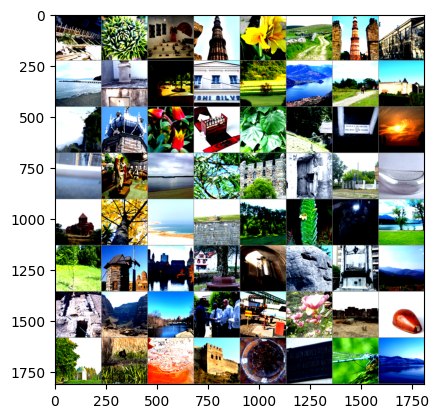

Labels: tensor([10,  3, 44, 69,  5, 65, 69, 45, 41, 70, 44, 60, 16, 40, 25, 38, 32, 47,
         4, 31, 36, 26, 80, 71, 10, 44, 74, 36, 46, 47, 45, 31, 48,  3, 11,  9,
        16,  4, 37, 39,  5, 56,  8, 16, 48, 75, 70, 75,  7, 24,  8, 19, 11, 20,
        59, 31, 61, 42, 11,  0, 48, 70, 57, 41])


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Function to display a batch of images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of data
inputs, labels = next(iter(train_loader))

# Show images
imshow(torchvision.utils.make_grid(inputs))
print("Labels:", labels)

In [6]:
# Get the class-to-index mapping
class_to_idx = full_dataset.class_to_idx
print("Class-to-Index Mapping:", class_to_idx)

Class-to-Index Mapping: {'Akkerman_fortress-20231230T031135Z-001': 0, 'Angkor_Wat-20231230T031410Z-001': 1, 'Biblioteca_Nacional_de_Espaa-20231230T031413Z-001': 2, 'Botanical_Garden_Jevremovac-20231230T031922Z-001': 3, 'Botanical_Garden_KIT-20231230T031417Z-001': 4, 'Botanical_garden_in_Kryvyi_Rih-20231230T031414Z-001': 5, 'Burrator-20231230T031418Z-001': 6, 'Caesarea_Maritima-20231230T031420Z-001': 7, 'Central_Park-20231230T032009Z-001': 8, 'Citadelle_de_Qubec-20231230T032014Z-001': 9, 'Corktown_Toronto-20231230T032020Z-001': 10, 'Dead_Sea-20231230T032120Z-001': 11, 'Dwarves_in_Wrocaw-20231230T032124Z-001': 12, 'Edinburgh_Castle-20231230T032131Z-001': 13, 'Eiffel_Tower-20231230T032138Z-001': 14, 'Enchanted_Floral_Gardens_of_Kula-20231230T032141Z-001': 15, 'Enz-20231230T032145Z-001': 16, 'Episcopal_Diocese_of_Southwest_Florida-20231230T032150Z-001': 17, 'Financial_District_Manhattan-20231230T035758Z-001': 18, 'First_Landing_State_Park-20231230T035759Z-001': 19, 'Fomin_Botanical_Garden-

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.nn import DataParallel
import torchvision.models as models

# Set random seed for reproducibility
torch.manual_seed(42)

model_name = 'resnet'
feature_extract = True
train_on_gpu = torch.cuda.is_available()


device = torch.device("cuda:0" if train_on_gpu else "cpu")
if train_on_gpu:
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ ResNet152 """
        model_ft = models.resnet152(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    return model_ft, input_size

# Initialize different models
resnet_model, resnet_input_size = initialize_model("resnet", 84, feature_extract, use_pretrained=True)
if torch.cuda.device_count() > 1:
    resnet_model = DataParallel(resnet_model)

# Set up optimizer and learning rate scheduler
optimizer_resnet = optim.Adam(resnet_model.parameters(), lr=0.001)
scheduler_resnet = lr_scheduler.StepLR(optimizer_resnet, step_size=7, gamma=0.1)

CUDA is available! Training on GPU ...


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:00<00:00, 317MB/s] 


In [21]:
#using parallel training

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import time
import copy

# Function to train the model
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=1):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Move model to device outside the loop
    model = model.to(device)

    # Use DataParallel if multiple GPUs are available
    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs!")
        model = nn.DataParallel(model)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Create a dictionary of dataloaders
dataloaders = {'train': train_loader, 'val': val_loader}

# Define loss function 
criterion = nn.CrossEntropyLoss()

# Train each model
resnet_model = train_model(resnet_model, dataloaders, criterion, optimizer_resnet, scheduler_resnet, num_epochs=3)



Epoch 0
----------
train Loss: 2.3474 Acc: 0.4268
val Loss: 1.9441 Acc: 0.5048

Epoch 1
----------
train Loss: 1.6668 Acc: 0.5678
val Loss: 1.7284 Acc: 0.5494

Epoch 2
----------
train Loss: 1.4436 Acc: 0.6177
val Loss: 1.6677 Acc: 0.5598

Training complete in 41m 10s
Best val Acc: 0.5598


In [ ]:
from tqdm import tqdm
# resneXt model
feature_extract = True

dataloaders = {'train': train_loader, 'val': val_loader}
resnext_model, resnext_input_size = initialize_model("resnext", 84, feature_extract, use_pretrained=True)
resnext_model = resnext_model.to(device)
if torch.cuda.device_count() > 1:
    resnext_model = DataParallel(resnext_model)

optimizer_resnext = optim.Adam(resnext_model.parameters(), lr=0.001)
scheduler_resnext = lr_scheduler.StepLR(optimizer_resnext, step_size=7, gamma=0.1)
criterion = nn.CrossEntropyLoss()


# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    resnext_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer_resnext.zero_grad()
            
            outputs = resnext_model(inputs)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer_resnext.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            pbar.set_postfix(loss=running_loss / (len(train_loader)), acc=100 * correct / total)
    
    # Validation loop
    resnext_model.eval()
    val_correct = 0
    val_total = 0
    
    with tqdm(val_loader, desc=f'Validation', unit='batch') as val_pbar:
        for val_inputs, val_labels in val_pbar:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            
            val_outputs = resnext_model(val_inputs)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
            
            val_pbar.set_postfix(acc=100 * val_correct / val_total)
    
    scheduler_resnext.step()

# 保存模型参数
torch.save(resnext_model.state_dict(), 'resnext_model.pth')

In [22]:
torch.save(resnet_model.state_dict(), 'trained_model.pth')

In [23]:
loaded_model = models.resnet152()

# Load the state dictionary into the model
state_dict = torch.load('/kaggle/input/training-pth-file-for-landmark-classification/trained_model.pth')

# Modify the state dictionary to match the current model architecture
state_dict['fc.weight'] = loaded_model.fc.weight
state_dict['fc.bias'] = loaded_model.fc.bias

# Load the modified state dictionary into the model
loaded_model.load_state_dict(state_dict)


<All keys matched successfully>

In [24]:
loaded_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
from torchvision import transforms
from PIL import Image
import torch
import requests
from io import BytesIO

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to perform inference and get top-k predictions with class names from an image URL
def predict_topk_classes_with_names_from_url(model, image_url, class_to_idx, topk=5):
    model.eval()  # Set the model to evaluation mode

    # Download the image from the URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Preprocess the input image
    img = preprocess(img)
    img = img.unsqueeze(0)  # Add batch dimension

    # Move the input tensor to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img = img.to(device)

    with torch.no_grad():
        output = model(img)

    # Get the top-k predicted classes and probabilities
    probabilities, predicted_classes = torch.topk(torch.softmax(output, 1), topk)
    probabilities = probabilities[0].tolist()
    predicted_classes = predicted_classes[0].tolist()

    # Map class indices to class names using the provided class_to_idx mapping
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    topk_class_names = [idx_to_class[idx] for idx in predicted_classes]

    # Create a list of (class_name, probability) tuples
    topk_predictions = list(zip(topk_class_names, probabilities))

    return topk_predictions

image_url = "https://imgs.search.brave.com/tCTt2PVOk5rMNqBnmdTy-VYf0xQtChCoqMcdXUDVqi4/rs:fit:500:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/cHJlbWl1bS1waG90/by9jZW50cmFsLXBh/cmstbmV3LXlvcmtf/NzIwMTQzLTI3NDUu/anBnP3NpemU9NjI2/JmV4dD1qcGc"# Replace with the URL to your image
topk_predictions = predict_topk_classes_with_names_from_url(resnet_model, image_url, class_to_idx, topk=5)


print("Top 5 Predictions:")
for class_name, probability in topk_predictions:
    class_name = class_name.split("-")[0].strip()
    print(f"{class_name}: {probability:.4f}")

Top 5 Predictions:
Lake_Bled: 0.7235
Central_Park: 0.1473
Enz: 0.0263
Lake_Ohrid: 0.0169
Lake_Como: 0.0160


In [50]:
model= models.resnext101_32x8d()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-8ba56ff5.pth
100%|██████████| 340M/340M [00:01<00:00, 302MB/s]  


In [55]:
loaded_model = models.resnext101_32x8d()

# Load the state dictionary into the model
resnext_model = torch.load('/kaggle/input/yvonnes-model/resnext_model.pth')
# Modify the state dictionary to match the current model architecture
resnext_model['fc.weight'] = loaded_model.fc.weight
resnext_model['fc.bias'] = loaded_model.fc.bias

# Load the modified state dictionary into the model
loaded_model.load_state_dict(resnext_model)


<All keys matched successfully>

In [57]:
import torch
from torchvision import models

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model architecture
loaded_model = models.resnext101_32x8d().to(device)

# Load the state dictionary
resnext_model = torch.load('/kaggle/input/yvonnes-model/resnext_model.pth', map_location=device)

# Modify the state dictionary to match the current model architecture
resnext_model['fc.weight'] = loaded_model.fc.weight
resnext_model['fc.bias'] = loaded_model.fc.bias

# Load the modified state dictionary into the model
loaded_model.load_state_dict(resnext_model)

# Set the model to evaluation mode
loaded_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

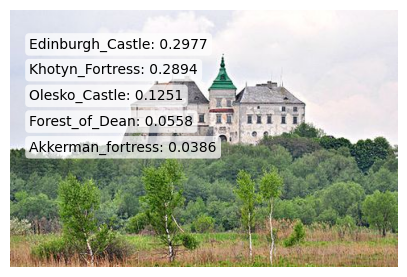

In [77]:
from torchvision import transforms
from PIL import Image
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to perform inference and get top-k predictions with class names from an image URL
def predict_topk_classes_with_names_from_url(model, image_url, class_to_idx, topk=5):
    model.eval()  # Set the model to evaluation mode

    # Download the image from the URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Preprocess the input image
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    # Move the input tensor to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_tensor = img_tensor.to(device)

    with torch.no_grad():
        output = model(img_tensor)

    # Get the top-k predicted classes and probabilities
    probabilities, predicted_classes = torch.topk(torch.softmax(output, 1), topk)
    probabilities = probabilities[0].tolist()
    predicted_classes = predicted_classes[0].tolist()

    # Map class indices to class names using the provided class_to_idx mapping
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    topk_class_names = [idx_to_class[idx] for idx in predicted_classes]

    # Display only the image without borders
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img)
    ax.axis("off")

    # Display predicted class labels and probabilities
    for i, (class_name, probability) in enumerate(zip(topk_class_names, probabilities)):
        class_name = class_name.split("-")[0].strip()
        bbox_props = dict(boxstyle="round", facecolor="white", alpha=0.7, edgecolor="none")
        ax.text(0.05, 0.85 - i * 0.1, f"{class_name}: {probability:.4f}", transform=ax.transAxes, fontsize=10, color='black', bbox=bbox_props)

    plt.show()

image_url = "https://imgs.search.brave.com/0sIEf8wt7vuccM6CEnpjbsjzTOE62bJldnkMMYtmJGQ/rs:fit:560:320:1/g:ce/aHR0cHM6Ly91cGxv/YWQud2lraW1lZGlh/Lm9yZy93aWtpcGVk/aWEvY29tbW9ucy90/aHVtYi9jL2M3L09s/ZXNrb19DYXN0bGUu/anBnLzUxMnB4LU9s/ZXNrb19DYXN0bGUu/anBn"# Replace with the URL to your image
predict_topk_classes_with_names_from_url(resnet_model, image_url, class_to_idx, topk=5)



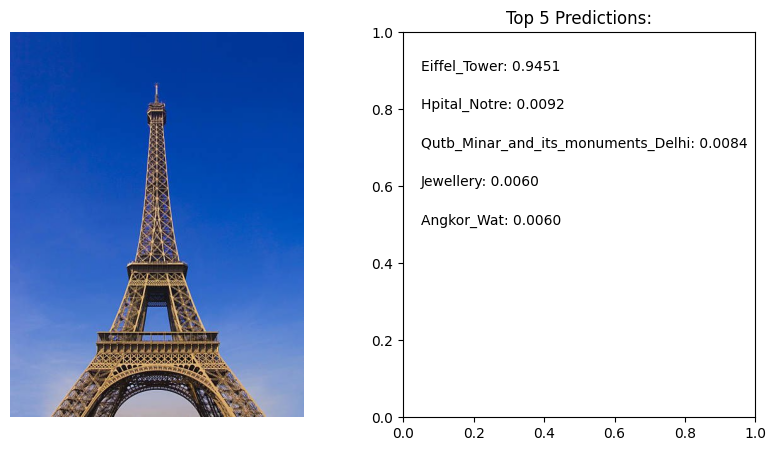

In [78]:
from torchvision import transforms
from PIL import Image
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to perform inference and get top-k predictions with class names from an image URL
def predict_topk_classes_with_names_from_url(model, image_url, class_to_idx, topk=5):
    model.eval()  # Set the model to evaluation mode

    # Download the image from the URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Preprocess the input image
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    # Move the input tensor to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_tensor = img_tensor.to(device)

    with torch.no_grad():
        output = model(img_tensor)

    # Get the top-k predicted classes and probabilities
    probabilities, predicted_classes = torch.topk(torch.softmax(output, 1), topk)
    probabilities = probabilities[0].tolist()
    predicted_classes = predicted_classes[0].tolist()

    # Map class indices to class names using the provided class_to_idx mapping
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    topk_class_names = [idx_to_class[idx] for idx in predicted_classes]

    # Display the image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    img_array = np.array(img)
    ax1.imshow(img_array)
    ax1.axis("off")

    # Display predicted class labels and probabilities
    ax2.set_title("Top 5 Predictions:")
    for i, (class_name, probability) in enumerate(zip(topk_class_names, probabilities)):
        class_name = class_name.split("-")[0].strip()
        ax2.text(0.05, 0.9 - i * 0.1, f"{class_name}: {probability:.4f}", transform=ax2.transAxes, fontsize=10, color='black')

    plt.show()

image_url = "https://imgs.search.brave.com/NdeEu2CBlUc74lveorWvtm4PFACTMHHgfUNaFBViaQA/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvOTgw/Mzg5MTEvcGhvdG8v/ZWlmZmVsLXRvd2Vy/LmpwZz9zPTYxMng2/MTImdz0wJms9MjAm/Yz1wWmN0cVNDMUpa/UmhNSjAxbEhDMzVj/V2hCd1pzNGwyb2s4/Y3AxZFpQQWJjPQ"# Replace with the URL to your image
predict_topk_classes_with_names_from_url(resnet_model, image_url, class_to_idx, topk=5)
